In [239]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import numpy as np
import pandas as pd
import json
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [242]:
import glob
import csv

#combine all csv files into one

delimiter = ','
csvs = glob.glob('/home/codonnell/tutors/tutmain/*.csv')
combined_csv = pd.concat([pd.read_csv(f) for f in csvs])
combined_csv.to_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')

In [241]:
sample=pd.read_csv('/home/codonnell/tutors/tutmain/all_tutors.csv')
sample.head()

KeyboardInterrupt: 

In [ ]:
len(sample)

In [ ]:
sample = sample.drop_duplicates()

In [ ]:
len(sample)

In [ ]:
sample['priceRange'] = sample['priceRange'].apply(float)

In [ ]:
def remove_hours(hours):
    if hours == 'Bio':
        return 0
    else:
        return float(hours.split(' ')[0].replace(',',''))

In [ ]:
def get_rating_count(agg):
    return int(json.loads(agg.replace("'",'"'))['ratingCount'])

In [ ]:
def get_rating_value(agg):
    val = json.loads(agg.replace("'",'"'))['ratingValue']
    if val:
        return float(val)
    else:
        return 0

In [ ]:
def get_review_count(agg):
    val = json.loads(agg.replace("'",'"'))['reviewCount']
    if val:
        return float(val)
    else:
        return 0

In [ ]:
def get_bio_length(bio):
    return len(bio.split(' '))

In [ ]:
def get_num_subjects(sub_list):
    return len(json.loads(sub_list.replace("'",'"')))

In [ ]:
sample['time_tutoring'] = sample['time_tutoring'].apply(remove_hours)

In [ ]:
sample['priceRange'].describe()

In [ ]:
sample_active = sample[sample['time_tutoring']>10]

In [ ]:
len(sample_active)

In [ ]:
sb.regplot(sample_active['time_tutoring'],sample_active['priceRange'])

In [ ]:
sample_active['rating_count'] = sample_active['aggregateRating'].apply(get_rating_count)
sample_active['rating_av_value'] = sample_active['aggregateRating'].apply(get_rating_value)
sample_active['review_count'] = sample_active['aggregateRating'].apply(get_review_count)
sample_active['bio_length'] = sample_active['bio'].apply(get_bio_length)
sample_active['num_subjects'] = sample_active['makesOffer'].apply(get_num_subjects)

In [ ]:
sb.regplot(sample_active['rating_count'],sample_active['priceRange'],color='green')

In [ ]:
sample_active_nzero = sample_active[sample_active['rating_av_value']>0]
sample_active_nrevzero = sample_active[sample_active['review_count']>0]

In [ ]:
sb.regplot(sample_active_nzero['rating_av_value'],sample_active_nzero['priceRange'],order=2, color = 'red')

In [ ]:
sb.regplot(sample_active_nrevzero['review_count'],sample_active_nrevzero['priceRange'],color ='green')

In [ ]:
sb.regplot(sample_active['bio_length'],sample_active['priceRange'],color ='brown')

In [ ]:
sample_active=sample_active[sample_active['num_subjects']<200]

In [ ]:
sb.regplot(sample_active['num_subjects'],sample_active['priceRange'],color ='brown')

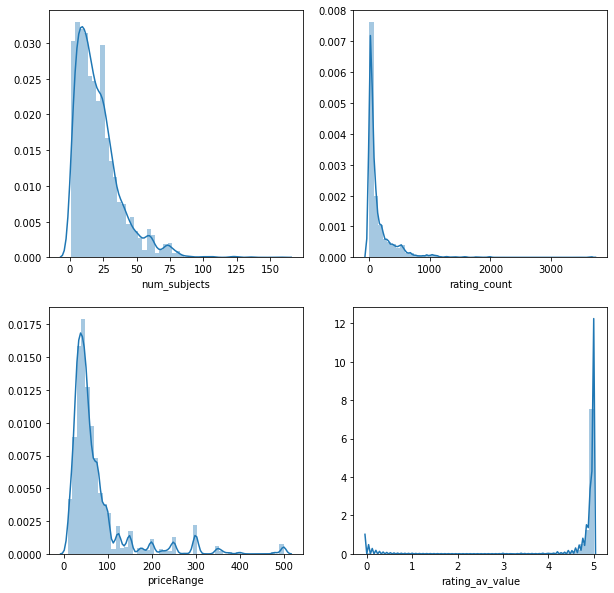

In [238]:
rcParams['figure.figsize'] = 10,10
f, axes = plt.subplots(2, 2)
sb.distplot(sample_active['num_subjects'], ax=axes[0,0])
sb.distplot(sample_active['priceRange'], ax=axes[1,0])
sb.distplot(sample_active['rating_count'], ax=axes[0,1])
sb.distplot(sample_active['rating_av_value'],ax=axes[1,1])

/home/codonnell/anaconda3/envs/insight/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 7.831220214604293] is not finite

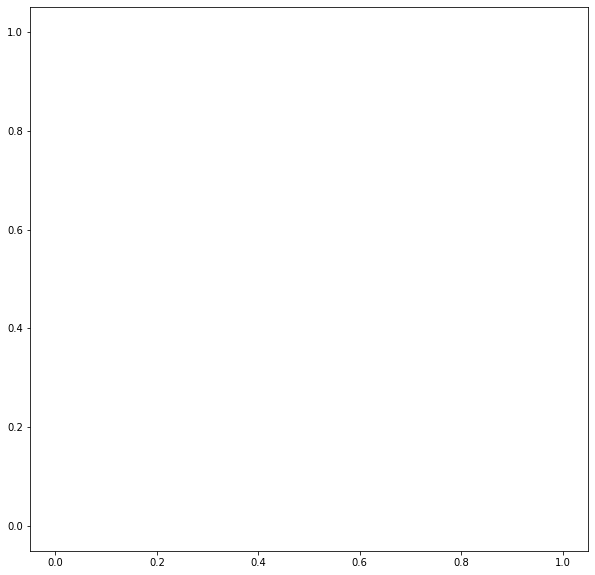

In [65]:
sb.distplot(sample_active['rating_count'],bins=20)

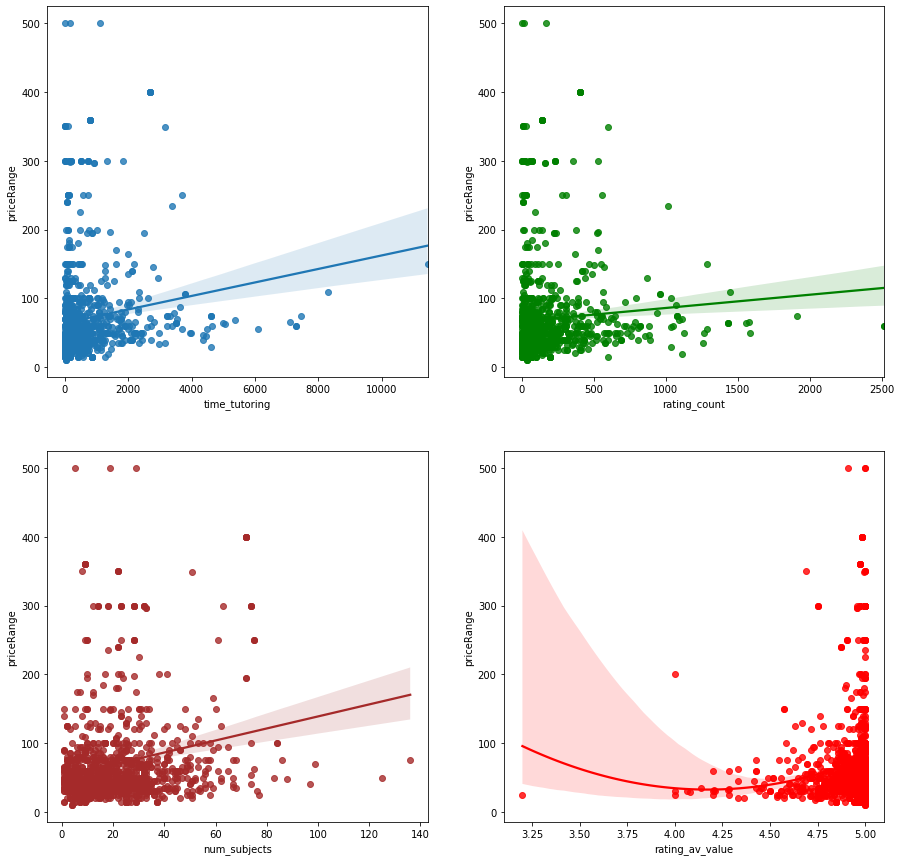

In [107]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

f, axes = plt.subplots(2, 2)
rcParams['figure.figsize'] = 15,15
    
sb.regplot(sample_active['time_tutoring'],sample_active['priceRange'], ax=axes[0,0])
sb.regplot(sample_active['rating_count'],sample_active['priceRange'],color='green',ax=axes[0,1])
sb.regplot(sample_active_nzero['rating_av_value'],sample_active_nzero['priceRange'],order=2, color = 'red',ax=axes[1,1])
sb.regplot(sample_active['num_subjects'],sample_active['priceRange'],color ='brown',ax=axes[1,0])
plt.savefig('/home/codonnell/tutors/basic_eda.png')

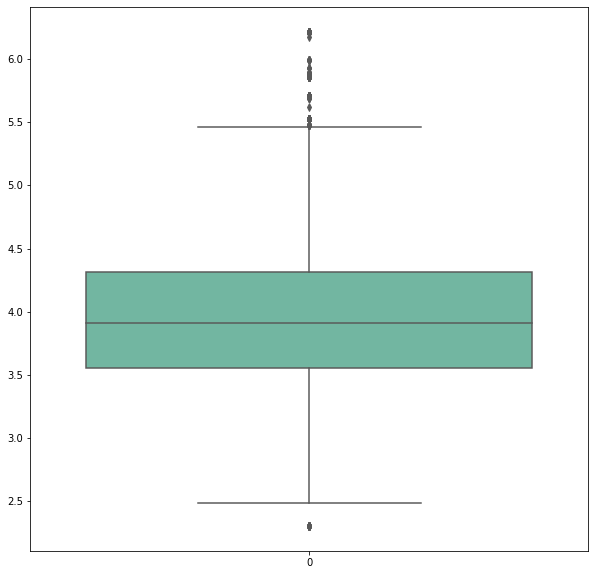

In [66]:
num_variables = ['priceRange','num_subjects','rating_av_value','rating_count','time_tutoring']
sb.boxplot(data=np.log(sample_active['priceRange']), palette = 'Set2')

In [60]:
len(sample_active[sample_active['priceRange']>150])/len(sample_active)*100

8.200138985406532

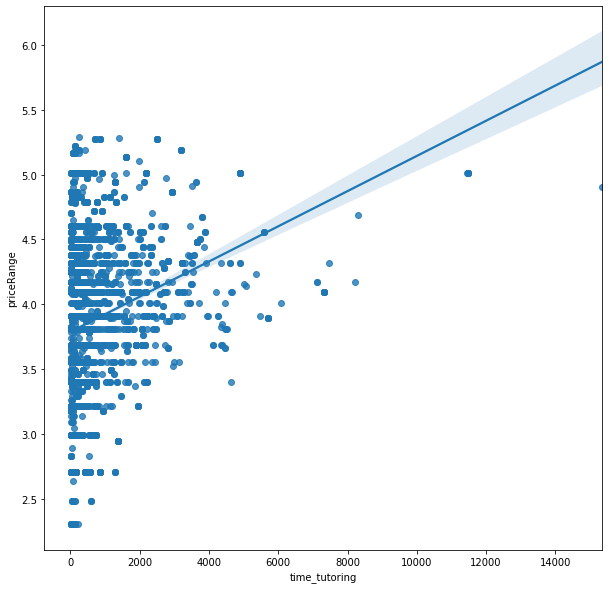

In [67]:
sample_no_out = sample_active[sample_active['priceRange']<200]
sb.regplot(sample_no_out['time_tutoring'],np.log(sample_no_out['priceRange']))

In [71]:
def get_subject_list(sub_list):
    sub_dicts = json.loads(sub_list.replace("'",'"'))
    return [sub['name'] for sub in sub_dicts]

In [74]:
sample_active['subject_list'] = sample_active['makesOffer'].apply(get_subject_list)

In [77]:
all_sub_lists = [i for i in sample_active['subject_list'].values]
all_subs = [item for sublist in all_sub_lists for item in sublist]

In [160]:
subject_counts = pd.Series(all_subs, name = 'subject_counts').value_counts()

In [144]:
unique_subs = pd.Series(all_subs).unique()
unique_subs

array(['Precalculus tutoring', 'French tutoring',
       'European History tutoring', 'Calculus tutoring',
       'Spanish tutoring', 'COOP/HSPT tutoring', 'Marketing tutoring',
       'Theater tutoring', 'Career Development tutoring', 'Film tutoring',
       'Social Studies tutoring', 'Video Production tutoring',
       'General Computer tutoring', 'Spelling tutoring',
       'Elementary Science tutoring', 'Elementary Math tutoring',
       'ACT Science tutoring', 'ACT Math tutoring',
       'ACT English tutoring', 'ACT Reading tutoring', 'SSAT tutoring',
       'PSAT tutoring', 'Microsoft Windows tutoring',
       'Microsoft Outlook tutoring', 'Macintosh tutoring',
       'ISEE tutoring', 'CBEST tutoring', 'College Counseling tutoring',
       'Public Speaking tutoring', 'GMAT tutoring',
       'SAT Writing tutoring', 'SAT Reading tutoring',
       'Proofreading tutoring', 'GRE tutoring', 'Songwriting tutoring',
       'SAT Math tutoring', 'English tutoring', 'Special Needs tutoring'

In [174]:
sub_labels = ['math','language','history','math','language','other','social','arts','other','arts','social','arts','computer',
'english','science','math','science','math','english','english','other','other','computer','computer','computer',
'other','other','other','english','english','english','english','english','other','arts','math','english',
'other','english','other','english','math','computer','computer','arts','math','computer','english','english',
'other','science','humanities','math','math','computer','arts','humanities','sport','english','other','arts',
 'sport','sport','sport','computer','sport','sport','sport','language','arts','other','other','math','math',
'other','math','humanities','humanities','arts','language','humanities','english','science','other','science',
'science','english','science','social','science','science','science','other','english','other','science',
'other','science','science','science','language','humanities','other','arts','language','other','math','math',
'math','programming','other','other','arts','arts','arts','other','other','other','science','english','language',
'social','social','other','language','arts','social','arts','science','computer','math','sport','social','other',
'language','social','social','arts','social','programming','computer','math','social','science','social','social',
'social','social','programming','programming','programming','programming','programming','math',
'language','social','humanities','social','social','social','social','social','social','social','arts','science',
'other','sport','programming','computer','computer','computer','computer','science','science','programming','sport',
'other','sport','sport','science','language','language','computer','programming','programming','programming',
'arts','arts','arts','sport','other','social','programming','programming','programming','computer','computer',
'computer','computer','science','science','science','social','science','social','arts','other','other','sport',
'other','other','other','computer','science','science', 'other','science','computer','arts','language','computer',
'science','language','other','arts','arts','language','arts','arts','arts','computer','programming','language',
'language','programming','other','programming','programming','language','language','language','arts','language',
'social','arts','language','sport','other','arts','sport','programming','computer','computer','arts',
'programming','science','programming','computer','computer','arts','language','programming','programming',
'programming','programming','programming','programming','computer','sport','other','science','other','arts',
'programming','language','language','programming','language','arts','language','programming','language','other',
'language']

In [171]:
len(unique_subs)

285

In [100]:
def listToString(s):
    str1 = " " 
    return (str1.join(s)) 

In [102]:
sample_active['subject_list_joined'] = sample_active['subject_list'].apply(listToString)
sample_active['subject_list_joined'].iloc[0]

'Precalculus tutoring French tutoring European History tutoring Calculus tutoring Spanish tutoring'

In [135]:
sub_avgs = {sub: get_subject_avgs(sub) for sub in unique_subs[149:]}

#for sub in unique_subs[:20]:
#    avg = sample_active[sample_active['subject_list_joined'].str.contains(sub)]['priceRange'].mean()
#    sub_avgs.update(sub:avg)

In [148]:
unique_subs = np.delete(unique_subs, 148)

In [112]:
def get_subject_avgs(sub):
    return sample_active[sample_active['subject_list_joined'].str.contains(sub)]['priceRange'].mean()

In [149]:
sub_avgs = {sub: get_subject_avgs(sub) for sub in unique_subs}

In [184]:
subjects_vals = pd.Series(sub_avgs, name='subject_avgs')
subject_labels = pd.Series(np.array(sub_labels),index = unique_subs, name='field')
#subject_labels = pd.DataFrame({'subject': unique_subs, 'field': np.array(sub_labels)})
subject_labels.head()

Precalculus tutoring             math
French tutoring              language
European History tutoring     history
Calculus tutoring                math
Spanish tutoring             language
Name: field, dtype: object

In [179]:
subjects_vals = subjects_vals[~subjects_vals.isnull()]

In [192]:
subjects_df = subject_counts.to_frame().join(subjects_vals.to_frame(), how ='inner')
subjects_df = subjects_df.join(subject_labels.to_frame(), how = 'left')
#subjects_df.sort_values(by='subject_counts')
#subjects_df.groupby('field')['subjects_vals'].count()
subjects_df.groupby('field')['subject_avgs'].mean()

field
arts            85.817964
computer        75.579381
english         83.364211
history         83.944559
humanities      89.073072
language        68.267559
math            87.212529
other           94.087757
programming     76.585764
science         80.601824
social         117.052321
sport           74.294789
Name: subject_avgs, dtype: float64

In [ ]:
subjects_df = pd.DataFrame({'subject': })

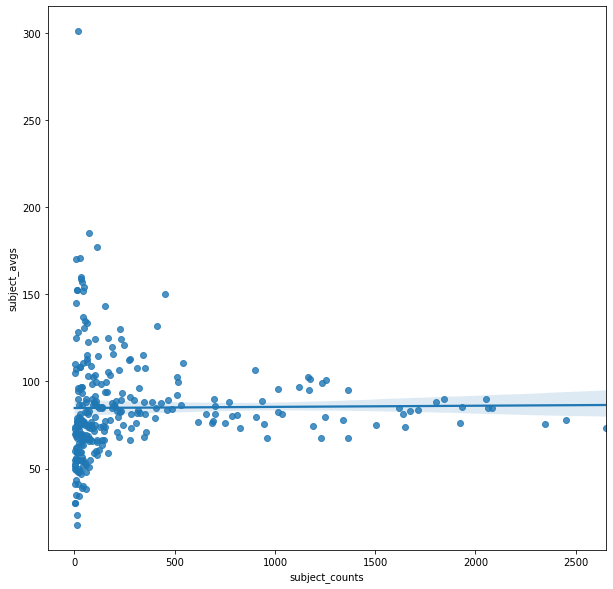

In [165]:
sb.regplot(subjects_df['subject_counts'],subjects_df['subject_avgs'])